In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df =pd.read_excel('regressao_linear.xlsx')
df.Month = pd.to_datetime(df.Data)
df.set_index('Data', inplace=True)
df.head()

FileNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df1 = df.iloc[:,0:1]
df1


,Midia_A
Data,
2018-01-01,3337.71
2018-01-08,5443.70
2018-01-15,4703.43
2018-01-22,6478.87
2018-01-29,7381.40
...,...
2020-11-02,10111.86
2020-11-09,10822.19
2020-11-16,16118.96


In [ ]:
df1['x1'] = df1.shift(1)
df1.dropna(axis=0, inplace=True)
df1.head()

<ipython-input-4-d444d822ef5f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['x1'] = df1.shift(1)
<ipython-input-4-d444d822ef5f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(axis=0, inplace=True)


,Midia_A,x1
Data,,
2018-01-08,5443.70,3337.71
2018-01-15,4703.43,5443.70
2018-01-22,6478.87,4703.43
2018-01-29,7381.40,6478.87
2018-02-05,6626.76,7381.40


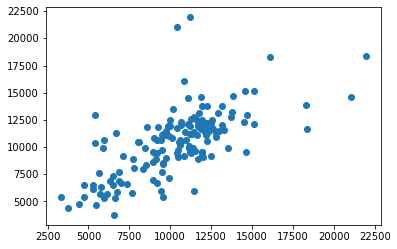

In [ ]:
plt.scatter(df1.x1,df1.Midia_A)

In [ ]:
from sklearn.linear_model import LinearRegression

X = df1.x1.values
y = df1.Midia_A.values

reg = LinearRegression().fit(X.reshape(-1, 1), y)
previsoes = reg.predict(X.reshape(-1, 1))
((y - previsoes)** 2).mean()

4911316.699155899

Text(0, 0.5, 'Midia_A')

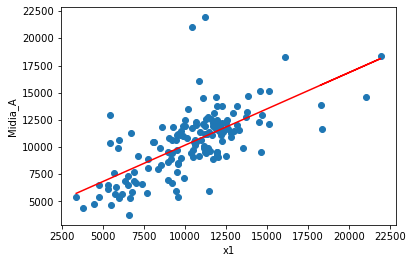

In [ ]:
plt.scatter(X, y)
plt.plot(X, reg.predict(X.reshape(-1, 1)), color='red')
plt.xlabel('x1')
plt.ylabel('Midia_A')

In [ ]:
df1['ar_1'] = previsoes
df1.head()

<ipython-input-10-deca5dd40a73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ar_1'] = previsoes


,Midia_A,x1,ar_1
Data,,,
2018-01-08,5443.70,3337.71,5747.671053
2018-01-15,4703.43,5443.70,7150.475091
2018-01-22,6478.87,4703.43,6657.379803
2018-01-29,7381.40,6478.87,7840.003843
2018-02-05,6626.76,7381.40,8441.180833


In [ ]:
from statsmodels.tsa.ar_model import AR

In [ ]:
df1.tail()
df1.drop('x1', axis=1)

,Midia_A,ar_1
Data,,
2018-01-08,5443.70,5747.671053
2018-01-15,4703.43,7150.475091
2018-01-22,6478.87,6657.379803
2018-01-29,7381.40,7840.003843
2018-02-05,6626.76,8441.180833
...,...,...
2020-11-02,10111.86,10933.434571
2020-11-09,10822.19,10259.945554
2020-11-16,16118.96,10733.097750
